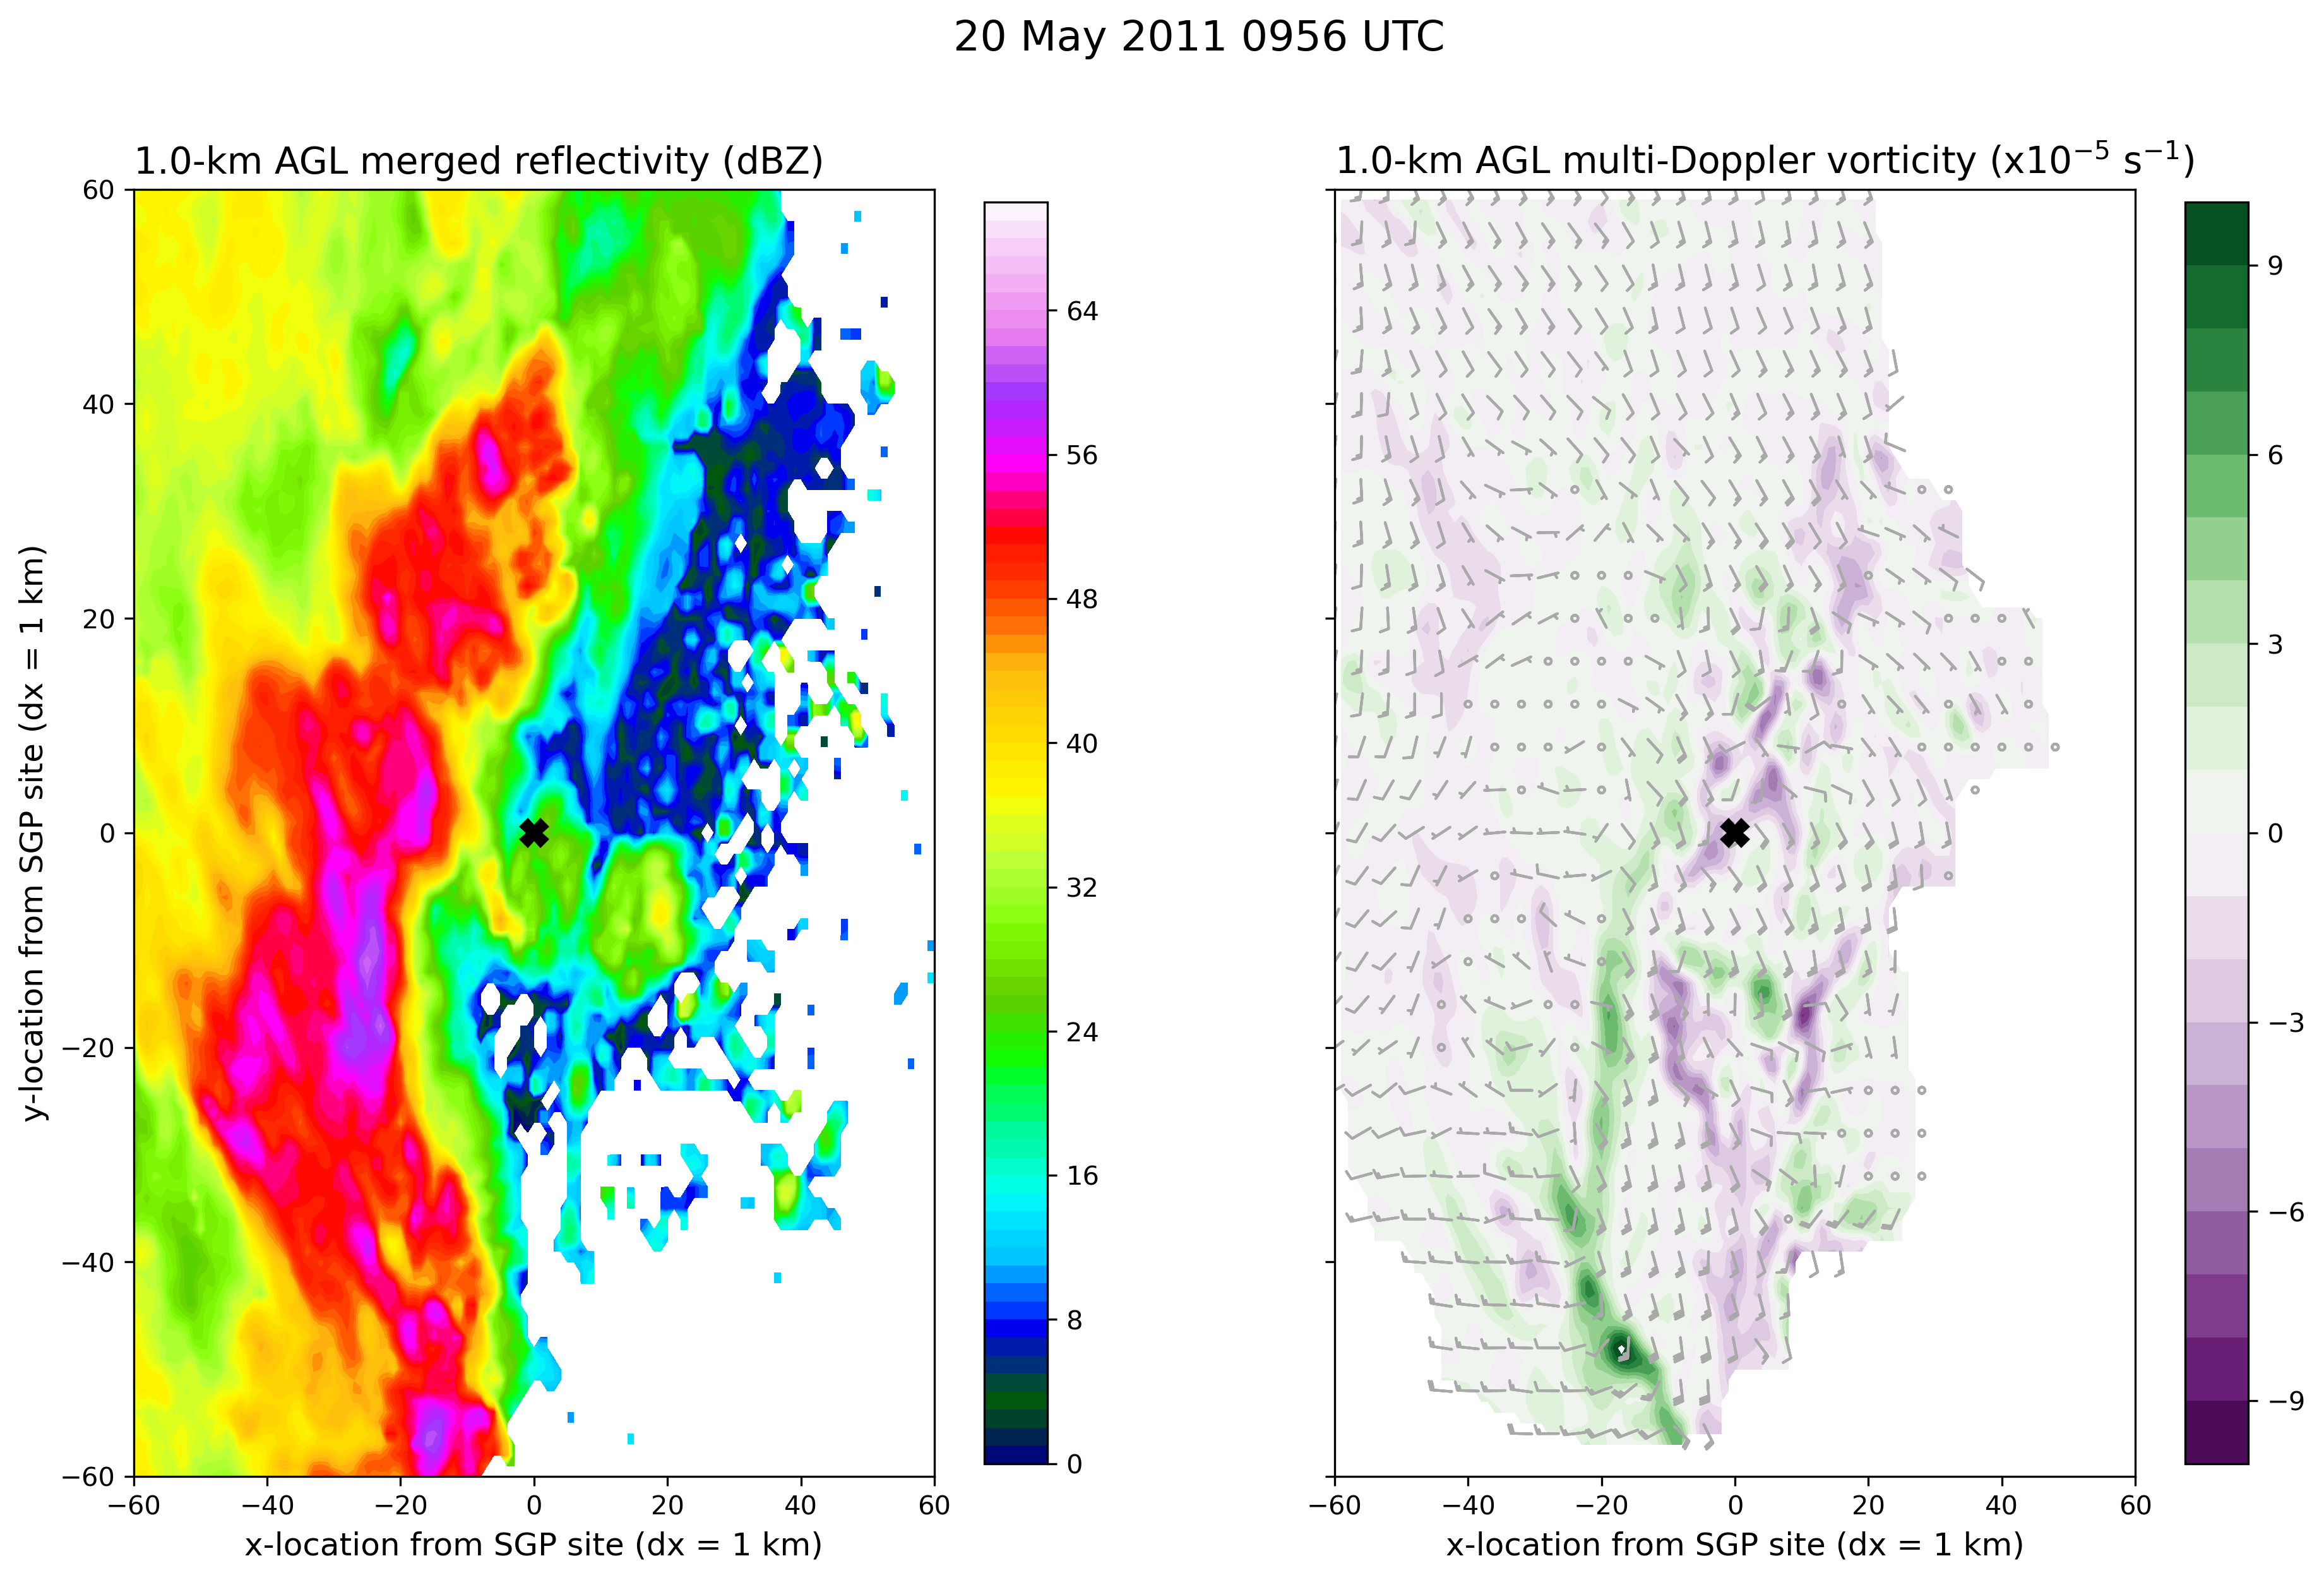

In [1]:
# load needed modules
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# specify the time at which you want data
# allowable values are 0901 and 0956
time = "0956"

# specify the height AGL at which you want data
# allowable values are 1-18 by ones
hgt = 1.

# open dataset in xarray, extract coordinate data
radfile = xr.open_dataset('20110520_' + time + '_grid_combined.cdf')
x, y = radfile.x.values, radfile.y.values

# get the desired data (here, DZ = merged reflectivity; 
# vertical grid is every 1 km, so z=N equals N-km AGL)
# and maskout values below a threshold (-99999. appears
# to be the missing data indicator, so we convert those
# to NaN for ease of plotting)
refl = radfile.DZ.sel(z=hgt)
reflmask = refl.where(refl > -1.)
vor = radfile.Vor.sel(z=hgt)
vormask = vor.where(vor > -99000.)
u = radfile.U.sel(z=hgt)
umask = u.where(u > -100.)
v = radfile.V.sel(z=hgt)
vmask = v.where(v > -100.)

# create a two-panel figure with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,9), dpi=300)

# plot reflectivity in the first panel
reflcol = ax1.contourf(x, y, reflmask, np.arange(0., 71., 1.), cmap='gist_ncar')
fig.colorbar(reflcol, ax=ax1, shrink=.98)
ax1.plot(0., 0., color='black', marker='X', markersize=10)
ax1.tick_params(axis='both', labelsize=10)
ax1.set_xlabel('x-location from SGP site (dx = 1 km)', fontsize=12)
ax1.set_ylabel('y-location from SGP site (dx = 1 km)', fontsize=12)
ax1.set_title(str(hgt) + '-km AGL merged reflectivity (dBZ)', fontsize=14, loc='left')

# plot vorticity in the second panel
vorcol = ax2.contourf(x, y, vormask, np.arange(-10., 11., 1.), cmap='PRGn')
fig.colorbar(vorcol, ax=ax2, shrink=.98)
#ax2.contour(x, y, vormask, np.arange(8., 8.1, 1.), colors='black', linestyles='solid', linewidths=2.)
ax2.barbs(x[::4], y[::4], umask.isel(x=slice(0,len(umask.x),4), y=slice(0,len(umask.y),4)), vmask.isel(x=slice(0,len(vmask.x),4), y=slice(0,len(vmask.y),4)), length=4, pivot='middle', barbcolor='darkgrey')
ax2.plot(0., 0., color='black', marker='X', markersize=10)
ax2.tick_params(axis='both', labelsize=10)
ax2.set_xlabel('x-location from SGP site (dx = 1 km)', fontsize=12)
ax2.set_title(str(hgt) + '-km AGL multi-Doppler vorticity (x10$^{-5}$ s$^{-1}$)', fontsize=14, loc='left')

# title and save the figure
plt.suptitle('20 May 2011 ' + time + ' UTC', fontsize=16)
plt.savefig('SGP_20110520_' + time + '_' + str(hgt) + 'km_analysis.png', bbox_inches='tight')